# Lab Meeting Demo Using the Iris Dataset

## Imports

In [1]:
#install.packages(c('tidyvers','ggpubr', 'viridis', 'caret', 'randomForest'))

In [2]:
library(tidyverse)
library(ggpubr)
library(viridis)
library(caret)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




## Misc Functions

In [3]:
# Sets plot to be the right area in inches on my computer display
# repr.plot.res needs to be calibrated for diferent displays
set_plot_area <- function(x,y,res=254){
    options(repr.plot.width = x, repr.plot.height = y, repr.plot.res = res)
    }

# Produces a 6" x 6" black square. Use to calibrate repr.plot.res
# find an accurate res value using a ruler
# insert correct res as the default res value in set_plot_area
calibration_square <- function(res){
    set_plot_area(6,6,res)
    plt <- ggplot() + theme_void() + theme(plot.background = element_rect(fill='black'))
    return(plt)
}

# Extract legend as separate ggplot object
g_legend<-function(a.gplot){
  tmp <- ggplot_gtable(ggplot_build(a.gplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)}


# Makes Scatter plots from the iris dataset
# Param1 and Param2 %in% c('Sepal.Width', 'Sepal.Length', 'Petal.Length', 'Petal.Width')
iris_scatter <- function(data, Param1, Param2){
    xlab <- gsub('l.', "l ", Param1)
    ylab <- gsub('l.', "l ", Param2)
    
    plt <- iris %>% ggplot(aes(x=.data[[Param1]], y=.data[[Param2]], color=Species)) + 
        geom_point() + 
        xlab(paste(xlab,' (cm)')) + ylab(paste(ylab,' (cm)')) + 
        theme_grey(base_size = 10) 
    
    return(plt)
}

# Creates a bar plot with standard deviation for each each species of Param
# Param %in% c('Sepal.Width', 'Sepal.Length', 'Petal.Length', 'Petal.Width') 
iris_bars <- function (data, Param){
    ylab <- gsub("l.", "l ", Param)
    tmp <- data %>% group_by(Species) %>% summarize(mn = mean(get(Param)), 
        stdev = sd(get(Param)))
    
    plt <- tmp %>% ggplot(aes(x = Species, y = mn, fill = Species)) + 
        geom_bar(stat = "identity") + geom_errorbar(aes(ymin = mn - 
        stdev, ymax = mn + stdev, width = 0.2)) + ylab(paste(ylab, 
        " (cm)")) + theme_grey(base_size = 10) + theme(legend.position = "none") + 
        theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 90, 
            vjust = 0.5, hjust = 1))

    return(plt)
}

# Creates a random forest to classify irises based on Param1 and Param2 using caret
# Returns a plot of the confusion matrix
# Param1 and Param2 %in% c('Sepal.Width', 'Sepal.Length', 'Petal.Length', 'Petal.Width')
iris_randomForest <- function(data,Param1,Param2){
    set.seed(42) 
    data <- data %>% select(all_of(c('Species',Param1,Param2)))
    
    inTrain <- createDataPartition(y = data$Species,  p = .75, list =FALSE)
    
    training <- data[ inTrain,]
    testing  <- data[-inTrain,]
    
    species_fit <- train(
      Species ~ .,
      data = training,
      method = "rf",
      preProc = c("center", "scale"),
      tuneLength = 1
    )
    
    species_predict <- predict(species_fit, newdata = testing)
    
    comf_matrix <- confusionMatrix(data = species_predict, testing$Species)
    comf_matrix_mat <- comf_matrix$table / sum(comf_matrix$table) * 100
    
    plt <- comf_matrix_mat %>% as.data.frame %>%
        ggplot(aes(x=Prediction, y=Reference, fill=Freq)) + 
        geom_tile() + scale_fill_viridis('% Obs') + xlab('Predicted') + ylab('Observed') +
        theme_grey(base_size=10) + 
        theme(axis.text.x = element_text(angle = 90,vjust=.5,hjust=1)) 
    
    return(plt)
}

# Analysis

## Read in Data

In [4]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [5]:
iris$Species %>% unique

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

## Sepal Plots

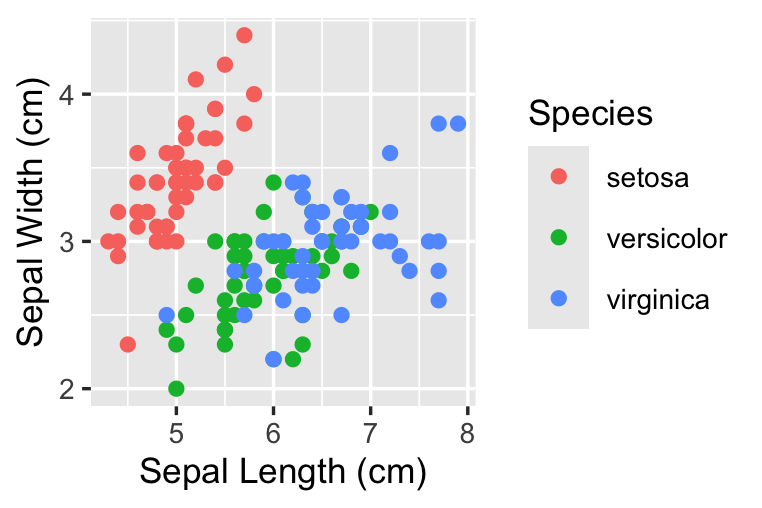

In [6]:
set_plot_area(3,2)

sepal_plt_a <- iris %>% ggplot(aes(x=Sepal.Length, y=Sepal.Width, color=Species)) + 
    geom_point() + 
    xlab('Sepal Length (cm)') + ylab('Sepal Width (cm)') + 
    theme_grey(base_size = 10) + scale_y_continuous(breaks=c(2,3,4))

sepal_plt_a

#### Made a function iris_scatter()

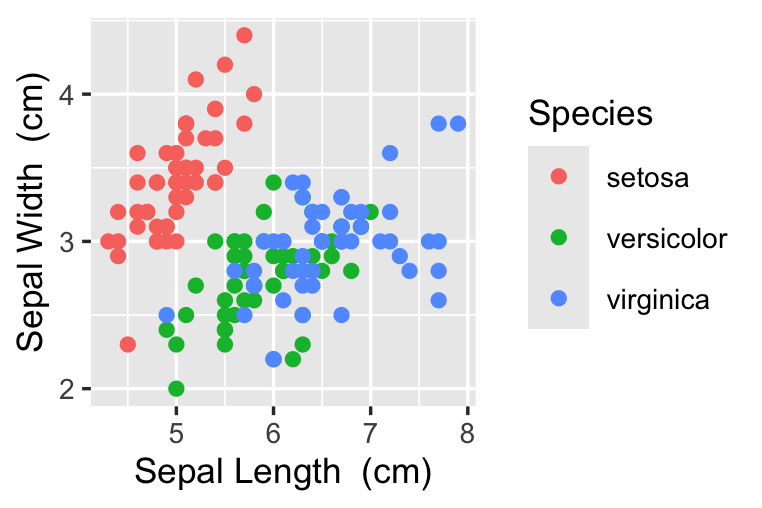

In [7]:
set_plot_area(3,2)

sepal_plt_a <- iris_scatter(iris, 'Sepal.Length','Sepal.Width') + scale_y_continuous(breaks=c(2,3,4))
sepal_plt_a

In [8]:
sepal_len_sum <- iris %>% group_by(Species) %>% summarize(mn = mean(Sepal.Length), stdev=sd(Sepal.Length))
sepal_len_sum

sepal_wid_sum <- iris %>% group_by(Species) %>% summarize(mn = mean(Sepal.Width), stdev=sd(Sepal.Width))
sepal_wid_sum

Species,mn,stdev
<fct>,<dbl>,<dbl>
setosa,5.006,0.3524897
versicolor,5.936,0.5161711
virginica,6.588,0.6358796


Species,mn,stdev
<fct>,<dbl>,<dbl>
setosa,3.428,0.3790644
versicolor,2.770,0.3137983
virginica,2.974,0.3224966


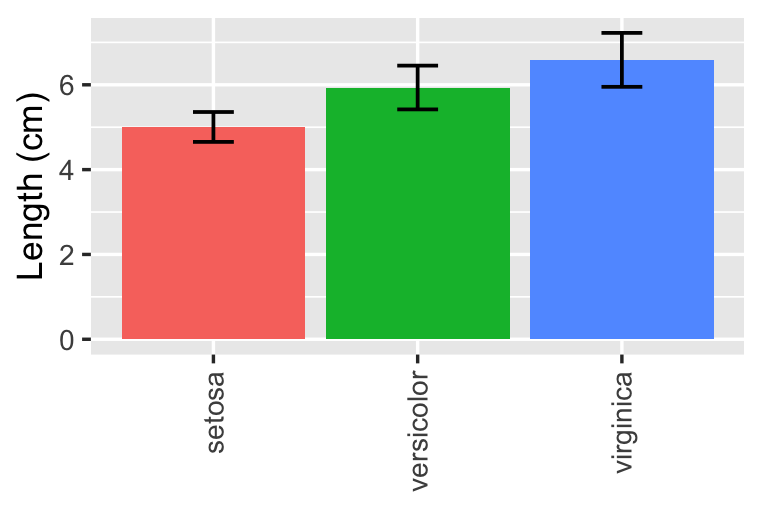

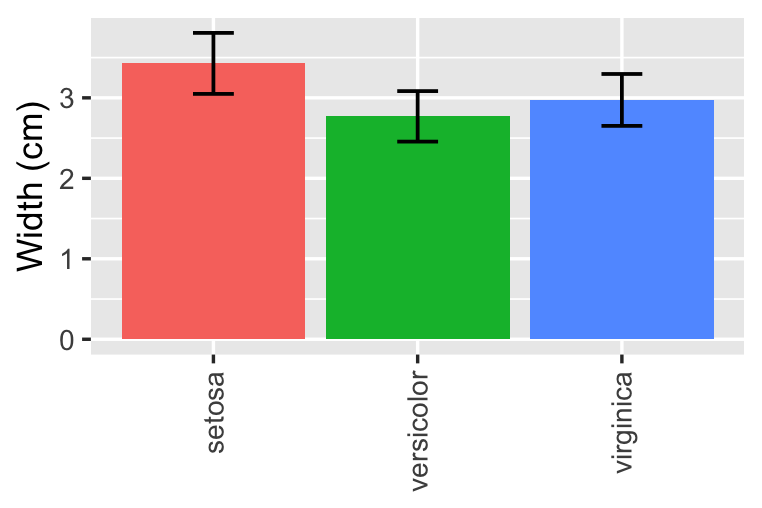

In [9]:
set_plot_area(3,2)

sepal_plt_b <- sepal_len_sum %>% 
    ggplot(aes(x=Species,y=mn, fill=Species)) + geom_bar(stat='identity') + 
    geom_errorbar(aes(ymin=mn-stdev, ymax=mn+stdev, width=.2)) +
    ylab('Length (cm)') + 
    theme_grey(base_size = 10) + 
    theme(legend.position='none') + theme(axis.title.x = element_blank(),
                                          axis.text.x = element_text(angle = 90,vjust=.5,hjust=1))

sepal_plt_b

sepal_plt_c <- sepal_wid_sum %>% 
    ggplot(aes(x=Species,y=mn, fill=Species)) + geom_bar(stat='identity') + 
    geom_errorbar(aes(ymin=mn-stdev, ymax=mn+stdev, width=.2)) +
    ylab('Width (cm)') + 
    theme_grey(base_size = 10) + 
    theme(legend.position='none') + theme(axis.title.x = element_blank(),,
                                          axis.text.x = element_text(angle = 90,vjust=.5,hjust=1))


sepal_plt_c

#### Made a function iris_bars()

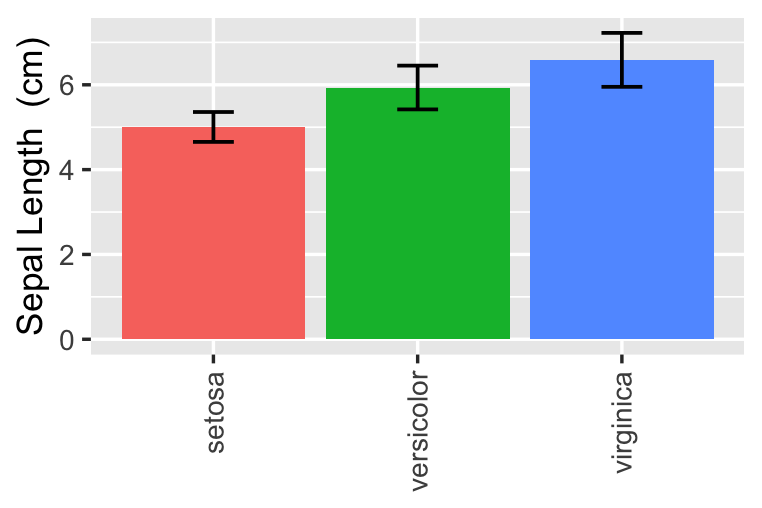

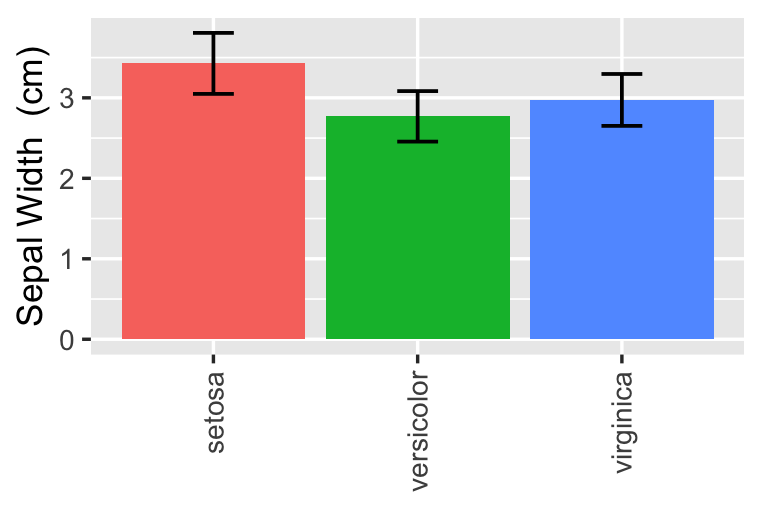

In [10]:
sepal_plt_b <- iris %>% iris_bars('Sepal.Length')
sepal_plt_b

sepal_plt_c <- iris %>% iris_bars('Sepal.Width')
sepal_plt_c

### Ok now lets train an ML classifier to determine predictability of species from underlying data

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



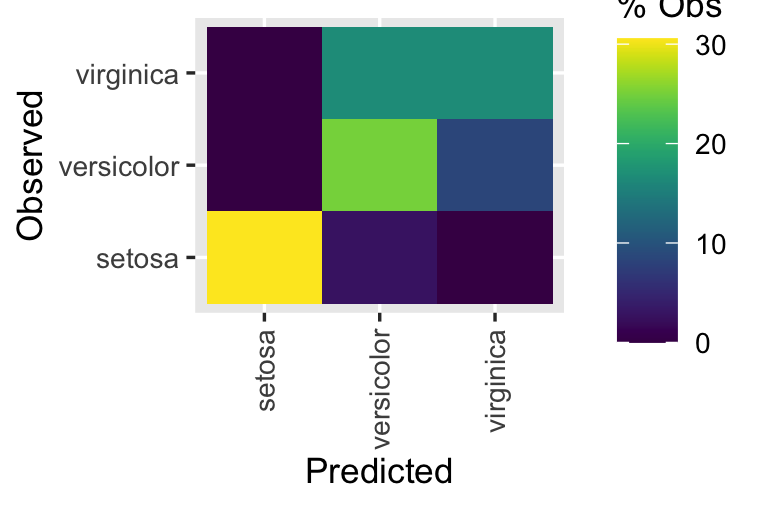

In [11]:
set_plot_area(3,2)

set.seed(42) 
inTrain <- createDataPartition(y = iris$Species,  p = .75, list =FALSE)

training <- iris[ inTrain,]
testing  <- iris[-inTrain,]

species_fit <- train(
  Species ~ Sepal.Width + Sepal.Length,
  data = training,
  method = "rf",
  preProc = c("center", "scale")
)

species_predict <- predict(species_fit, newdata = testing)

comf_matrix <- confusionMatrix(data = species_predict, testing$Species)
comf_matrix_mat <- comf_matrix$table / sum(comf_matrix$table) * 100

sepal_plt_d <- comf_matrix_mat %>% as.data.frame %>%
    ggplot(aes(x=Prediction, y=Reference, fill=Freq)) + 
    geom_tile() + scale_fill_viridis('% Obs') + xlab('Predicted') + ylab('Observed') +
    theme_grey(base_size=10) + 
    theme(axis.text.x = element_text(angle = 90,vjust=.5,hjust=1)) 

sepal_plt_d

#### Made a function iris_randomForest()

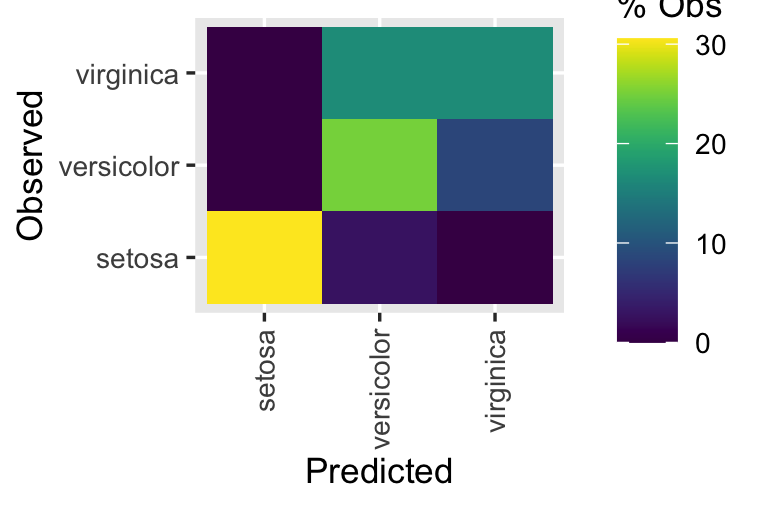

In [12]:
set_plot_area(3,2)

sepal_plt_d <- iris %>% iris_randomForest('Sepal.Length','Sepal.Width')
sepal_plt_d

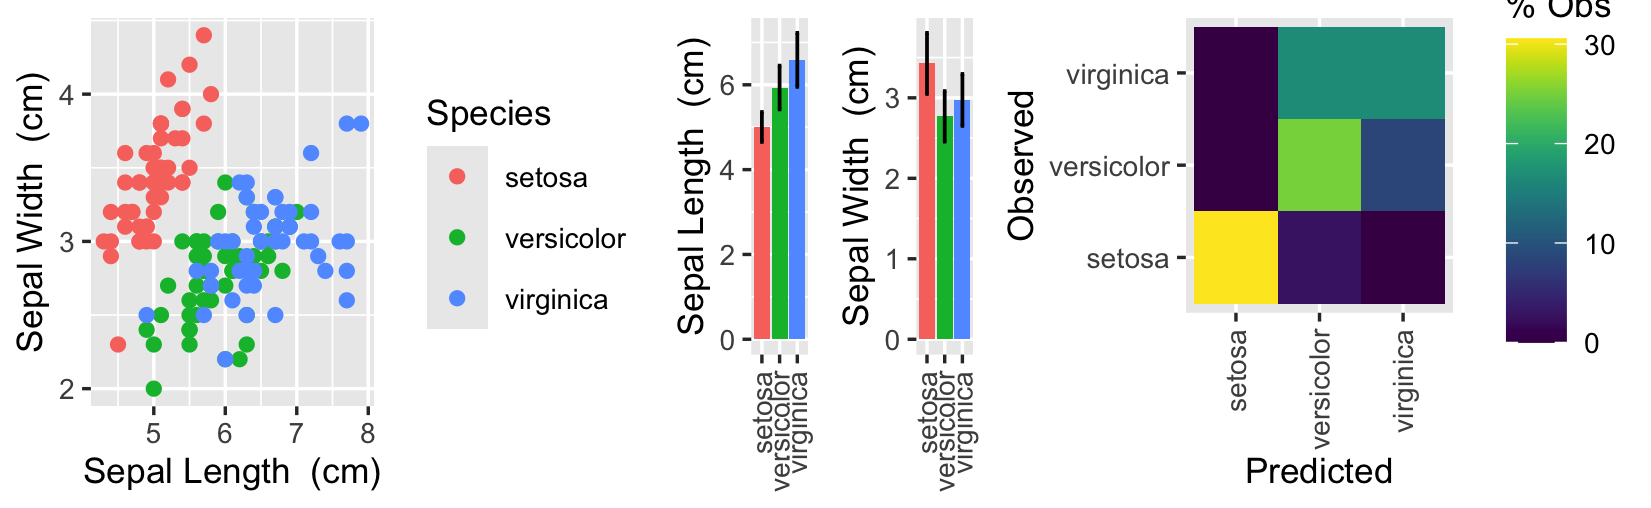

In [13]:
set_plot_area(6.5,2)

sepal_plt <- ggarrange(sepal_plt_a,
                       sepal_plt_b,
                       sepal_plt_c,
                       sepal_plt_d,
                       nrow=1,widths=c(1,.25,.25,1))
sepal_plt

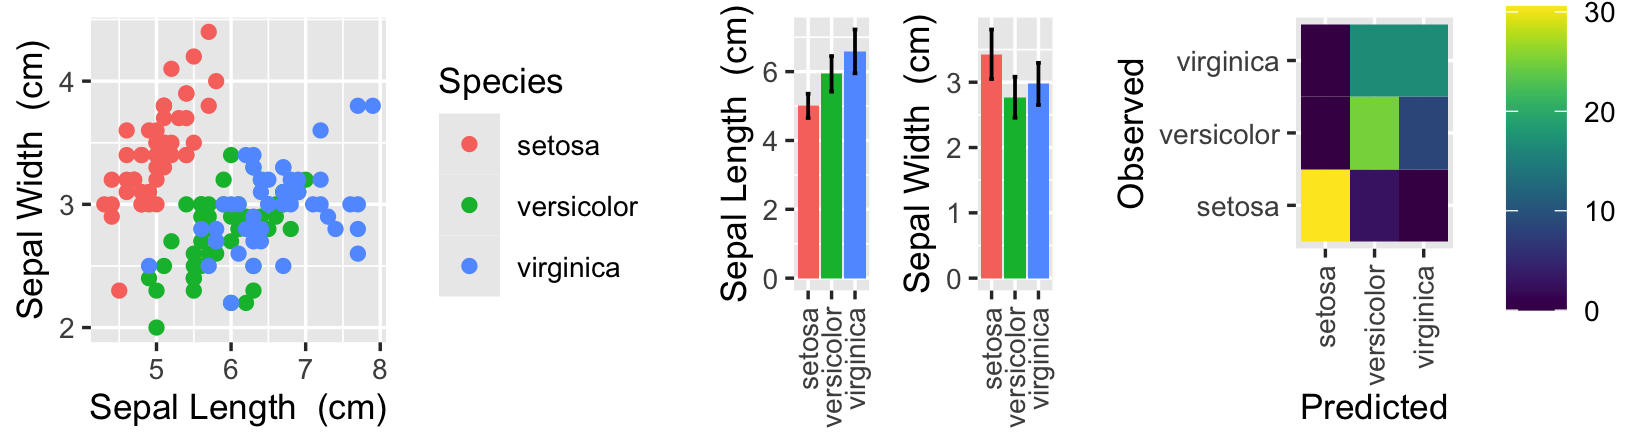

In [14]:
set_plot_area(6.5,1.75)

sepal_plt <- ggarrange(sepal_plt_a + theme(plot.title = element_blank()),
                       NULL,
                       sepal_plt_b, 
                       sepal_plt_c,
                       NULL,
                       sepal_plt_d,
                       nrow=1,widths=c(1.1,.05,.3,.3,.05,.9))
sepal_plt

#### Fix the legend on plt_d

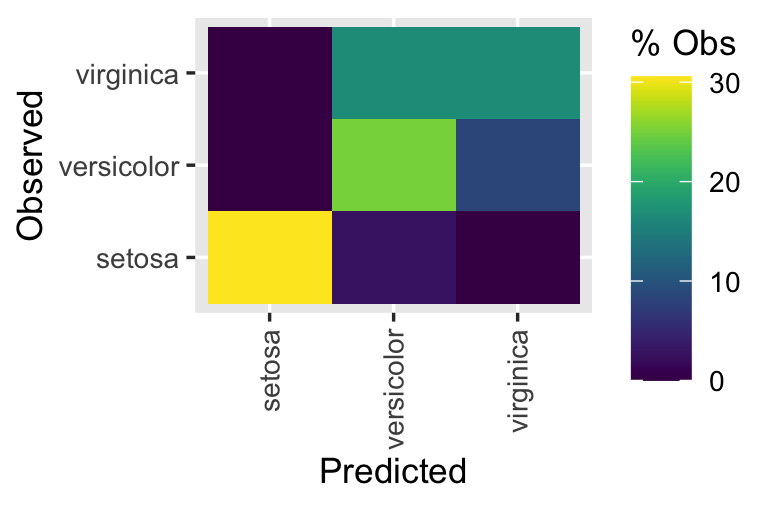

In [15]:
set_plot_area(3,2)

sepal_plt_d_leg <- sepal_plt_d %>% g_legend
sepal_plt_d_leg <- ggarrange(sepal_plt_d_leg, NULL, nrow=2, heights = c(1,.25))
sepal_plt_d2 <-  sepal_plt_d + theme(legend.position = 'none', plot.title = element_blank())
sepal_plt_d2 <- ggarrange(sepal_plt_d2,sepal_plt_d_leg,nrow=1,widths = c(1,.25))
sepal_plt_d2

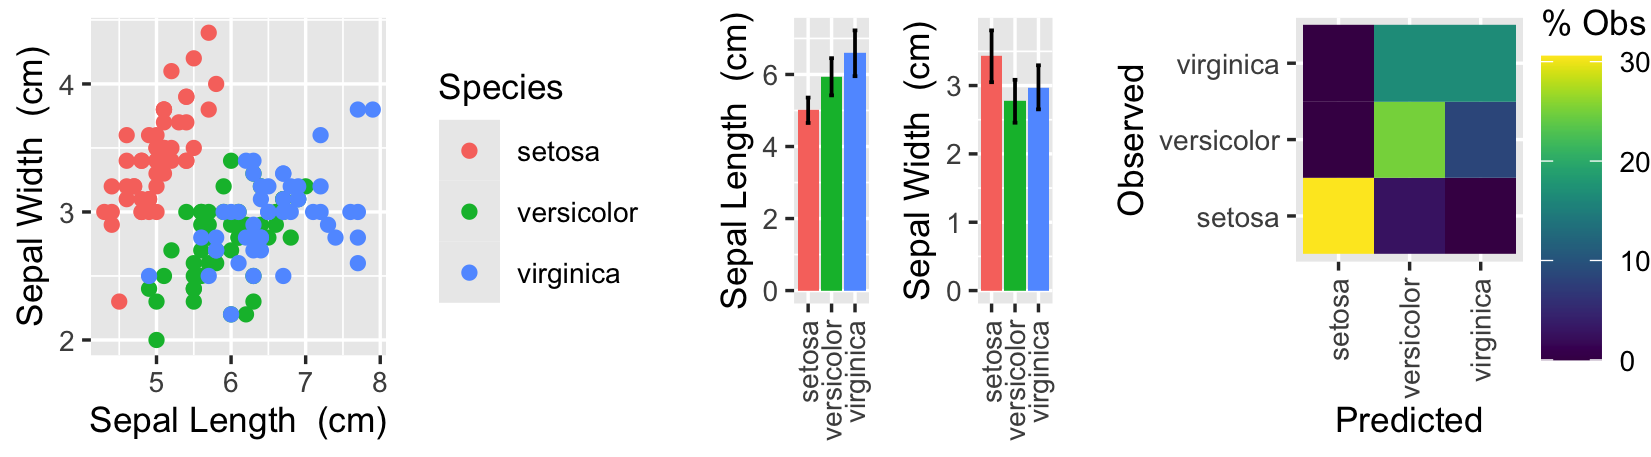

In [16]:
set_plot_area(6.5,1.8)

sepal_plt <- ggarrange(sepal_plt_a,
                       NULL,
                       sepal_plt_b, 
                       sepal_plt_c,
                       NULL,
                       sepal_plt_d2,
                       nrow=1,widths=c(1.1,.05,.3,.3,.05,.9))
sepal_plt

## Petal Plots

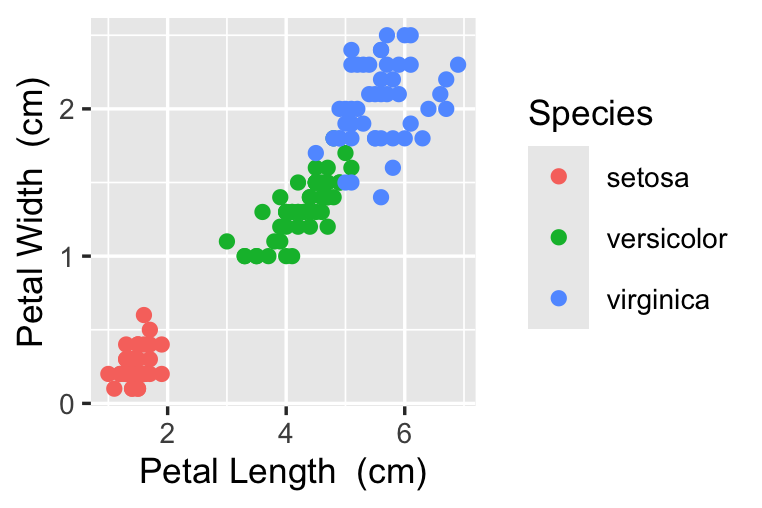

In [17]:
set_plot_area(3,2)

petal_plt_a <- iris %>% iris_scatter('Petal.Length','Petal.Width') + scale_y_continuous(breaks=c(0,1,2))
petal_plt_a

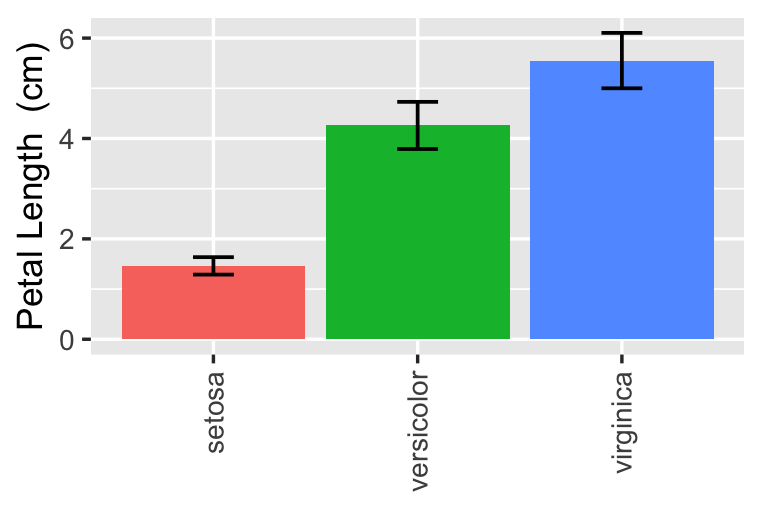

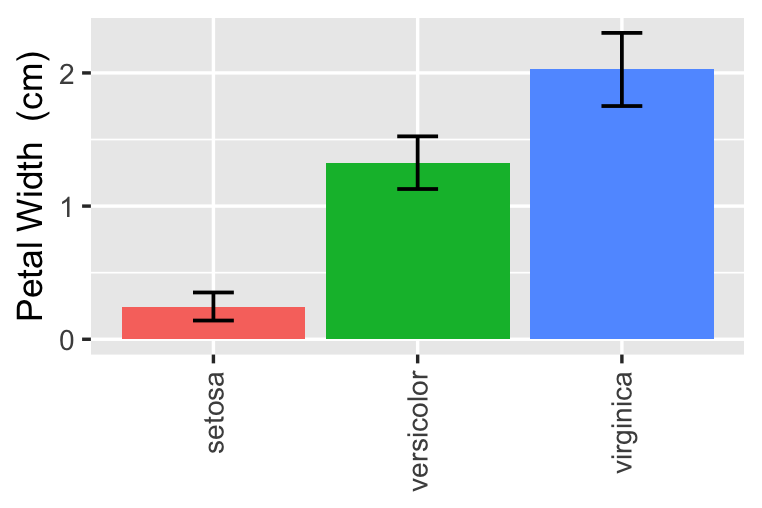

In [18]:
set_plot_area(3,2)

petal_plt_b <- iris %>% iris_bars('Petal.Length')
petal_plt_b

petal_plt_c <- iris %>% iris_bars('Petal.Width') + scale_y_continuous(breaks=c(0,1,2))
petal_plt_c

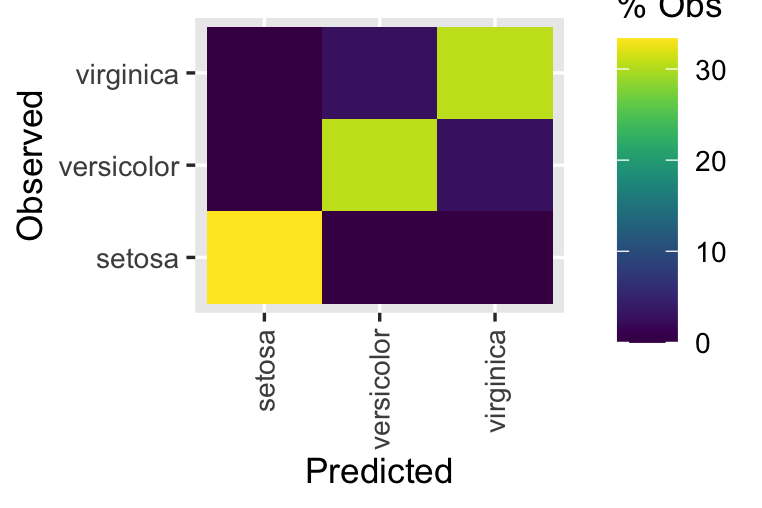

In [19]:
set_plot_area(3,2)

petal_plt_d <- iris %>% iris_randomForest('Petal.Length','Petal.Width')
petal_plt_d

In [20]:
petal_plt_d_leg <- petal_plt_d %>% g_legend
petal_plt_d_leg <- ggarrange(petal_plt_d_leg, NULL, nrow=2, heights = c(1,.25))
petal_plt_d2 <-  petal_plt_d + theme(legend.position = 'none', plot.title = element_blank())
petal_plt_d2 <- ggarrange(petal_plt_d2,petal_plt_d_leg,nrow=1,widths = c(1,.25))

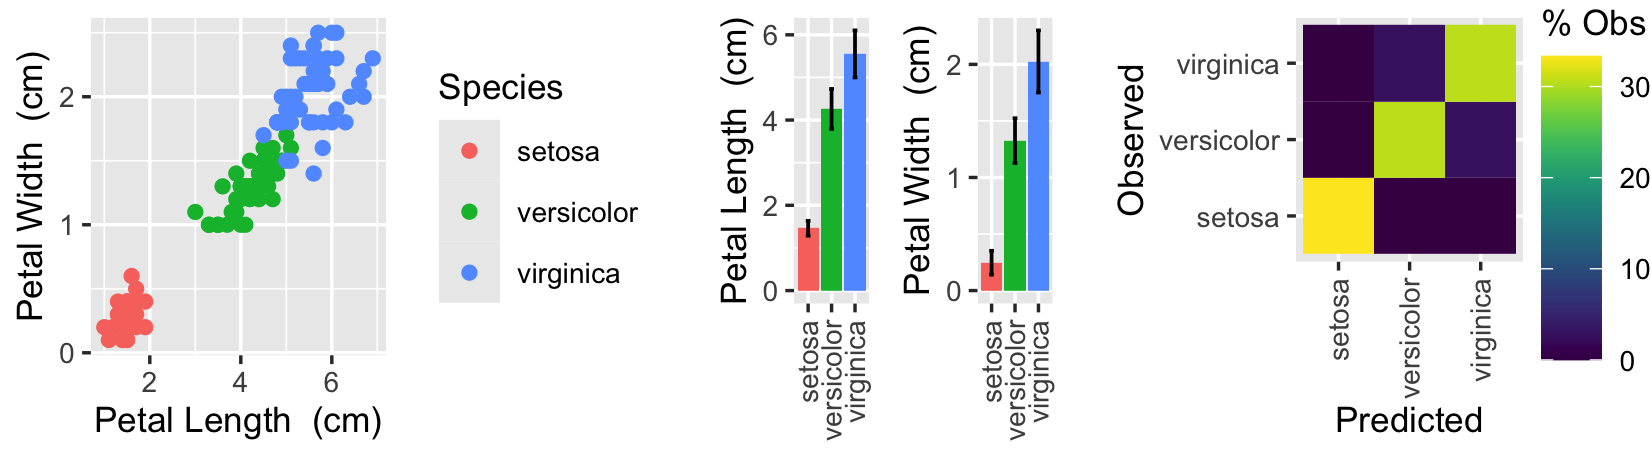

In [21]:
set_plot_area(6.5,1.8)

petal_plt <- ggarrange(petal_plt_a,
                       NULL,
                       petal_plt_b, 
                       petal_plt_c,
                       NULL,
                       petal_plt_d2,
                       nrow=1,widths=c(1.1,.05,.3,.3,.05,.9))
petal_plt

## Combining the Plots

In [22]:
sepal_plt_annot <- sepal_plt %>% annotate_figure(top = '---------------------------------------------------------------Sepal---------------------------------------------------------------\n',fig.lab.size = 16,fig.lab.face='bold')
petal_plt_annot <- petal_plt %>% annotate_figure(top = '---------------------------------------------------------------Petal---------------------------------------------------------------\n',fig.lab.size = 16,fig.lab.face='bold')

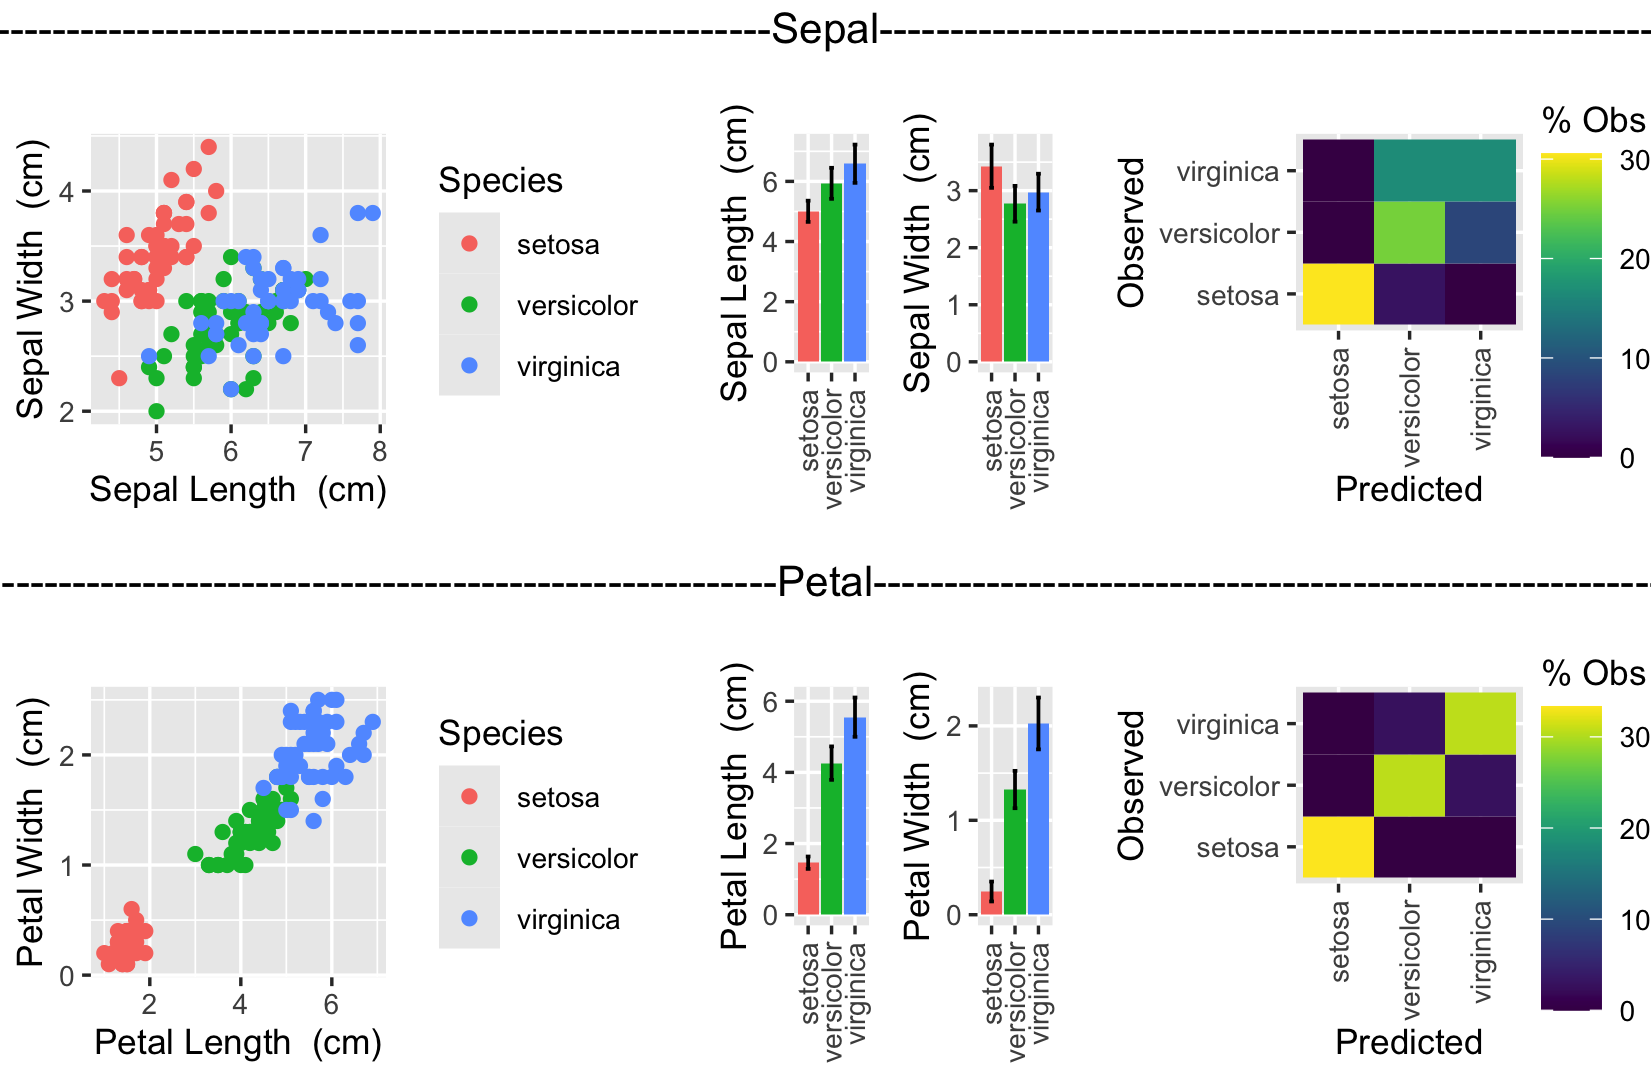

In [23]:
set_plot_area(6.5,4.25)

final_plt <- ggarrange(sepal_plt_annot,
          NULL,
          petal_plt_annot,
          nrow=3, heights = c(1,.05,1))
final_plt

## Saving the image

In [24]:
ggsave(filename = 'iris_figure.png',
       plot = final_plt, 
       dpi = 300, width = 6.5, height = 4.25, units = 'in')

In [25]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS Sonoma 14.6

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] caret_6.0-94      lattice_0.22-6    viridis_0.6.5     viridisLite_0.4.2
 [5] ggpubr_0.6.0      lubridate_1.9.3   forcats_1.0.0     stringr_1.5.1    
 [9] dplyr_1.1.4       purrr_1.0.2       readr_2.1.5       tidyr_1.3.1      
[13] tibble_3.2.1      ggplot2_3.5.1     tidyverse_2.0.0  

loaded via a namespace (and not attached):
 [1] tidyselect_1.2.1     timeDate_4041.110    IRdisplay_1.1       
 [4] farver_2.1.2  